In [1]:
# !pip install peqnp --install-option=pixie
import numpy as np
import peqnp as pn
import matplotlib.pyplot as plt

In [2]:
def plot(I, J, X=None, title='Original', obj=0):
    plt.figure(figsize=(10, 10))
    plt.title('{} : {}'.format(title, obj))
    a, b = zip(*I)
    plt.scatter(a, b, c='blue', s=100, alpha=0.7)
    a, b = zip(*J)
    plt.scatter(a, b, c='red', s=200, alpha=0.7)
    if X is not None:
        for i in range(m):
            for j in range(n):
                if X[i][j]:
                    plt.plot([I[i][0], J[j][0]], [I[i][1], J[j][1]], 'k-')
    plt.show()
    plt.close()

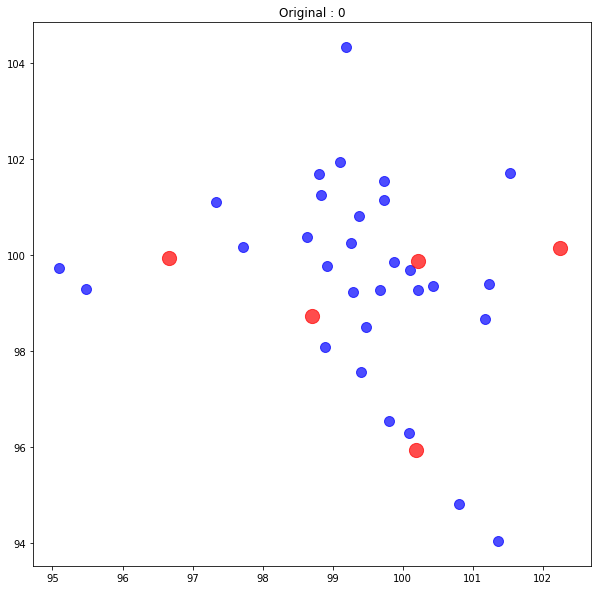

In [4]:
m = 30
n = 5
I = np.random.logistic(100, size=(m, 2))
J = np.random.logistic(100, size=(n, 2))
M = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        M[i][j] = int(np.linalg.norm(I[i] - J[j]))
plot(I, J, None)

26.0


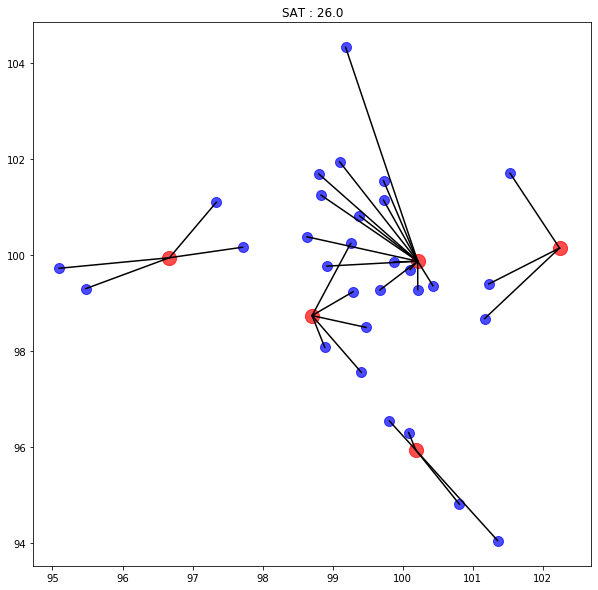

In [5]:
bits = 10
obj = 2 ** bits - 1
O = None
while True:
    pn.engine(bits)
    X = np.asarray(pn.matrix(dimensions=(m, n)))
    pn.all_binaries(X.flatten())
    assert sum(X.flatten()) == m
    assert sum(X[i][j] * M[i][j] for i in range(m) for j in range(n)) < obj
    assert (X.sum(axis=1) == 1).all()
    if pn.satisfy(turbo=True):
        O = np.vectorize(int)(X)
        obj = sum(O[i][j] * M[i][j] for i in range(m) for j in range(n))
    else:
        break
print(obj)
plot(I, J, O, 'SAT', obj)

26.0


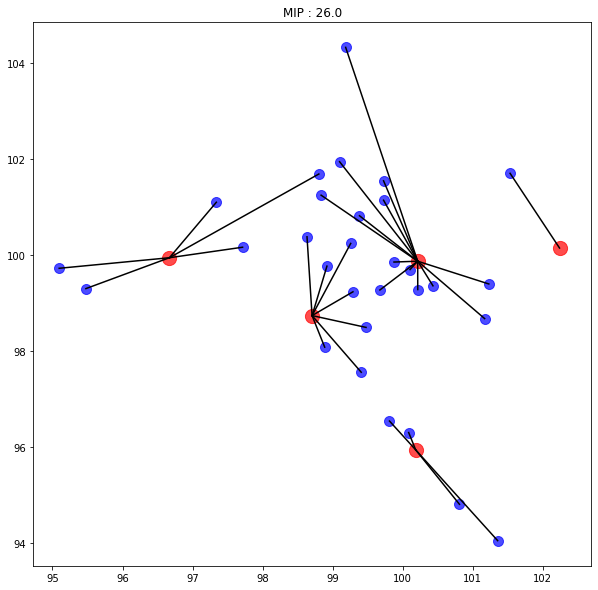

In [6]:
pn.engine(bits)
X = np.asarray(pn.matrix(dimensions=(m, n), is_mip=True))
pn.all_binaries(X.flatten())
assert sum(X.flatten()) == m
assert (X.sum(axis=1) == 1).all()
obj = pn.minimize(sum(X[i][j] * M[i][j] for i in range(m) for j in range(n)))
O = np.vectorize(int)(X)
print(obj)
plot(I, J, O, 'MIP', obj)

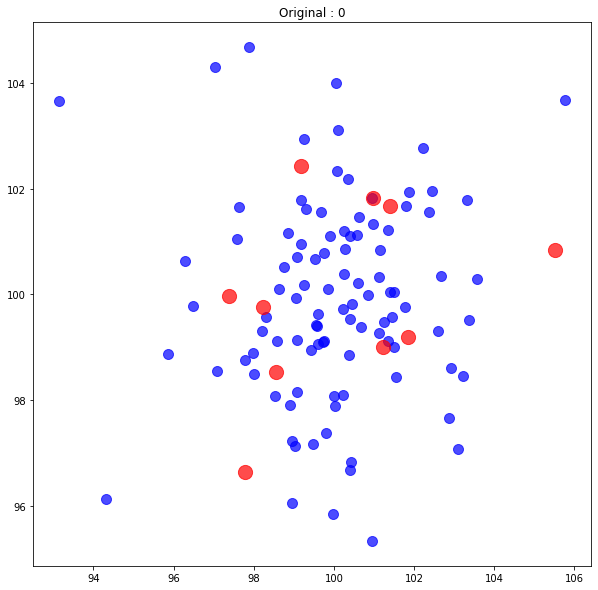

71.0


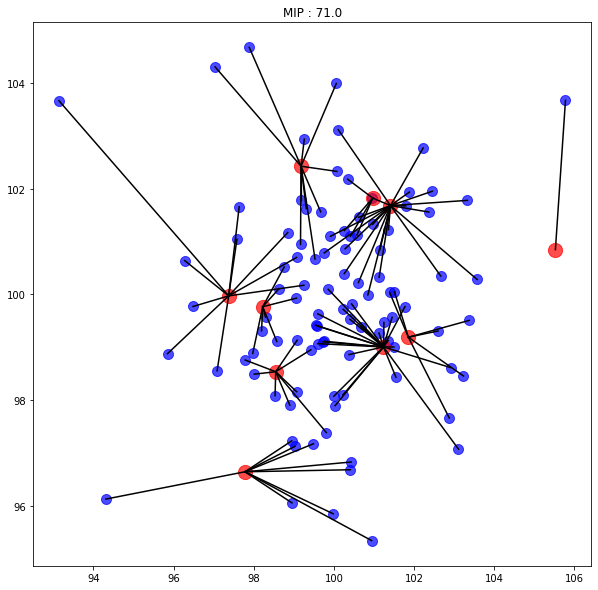

In [7]:
m = 100
n = 10
I = np.random.logistic(100, size=(m, 2))
J = np.random.logistic(100, size=(n, 2))
M = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        M[i][j] = int(np.linalg.norm(I[i] - J[j]))
plot(I, J, None)

pn.engine(bits)
X = np.asarray(pn.matrix(dimensions=(m, n), is_mip=True))
pn.all_binaries(X.flatten())
assert sum(X.flatten()) == m
assert (X.sum(axis=1) == 1).all()
obj = pn.minimize(sum(X[i][j] * M[i][j] for i in range(m) for j in range(n)))
O = np.vectorize(int)(X)
print(obj)
plot(I, J, O, 'MIP', obj)